In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
files = glob.glob('images/*jpeg')

In [3]:
files = ['images/IMG_%d.jpeg' % n for n in (6449, 6478, 6499, 6504)]

images/IMG_6449.jpeg (3024, 4032, 3)
(378, 504, 3)
images/IMG_6478.jpeg (3024, 4032, 3)
(378, 504, 3)
images/IMG_6499.jpeg (3024, 4032, 3)
(378, 504, 3)
images/IMG_6504.jpeg (3024, 4032, 3)
(378, 504, 3)


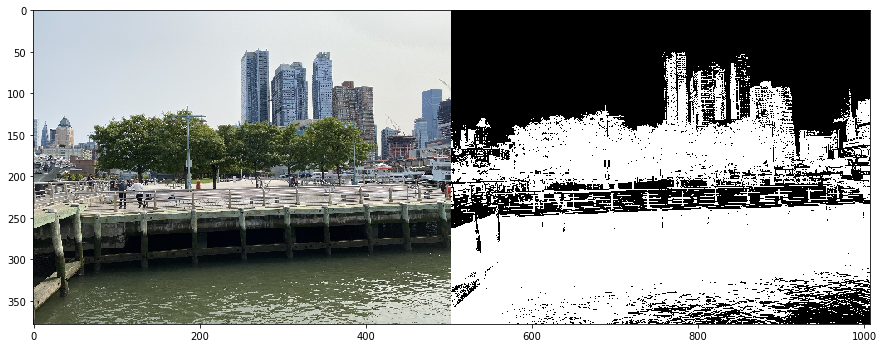

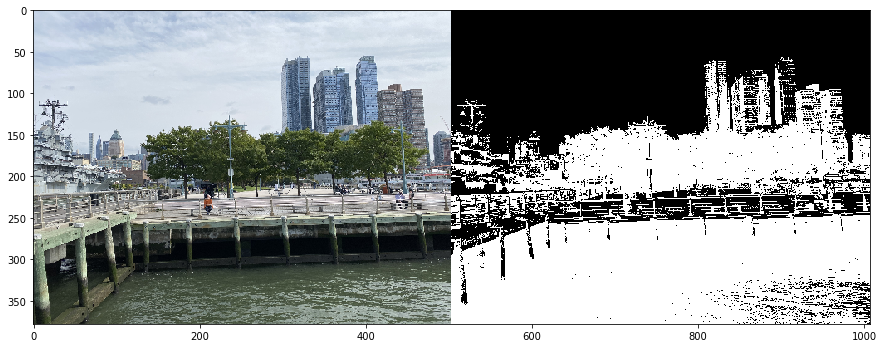

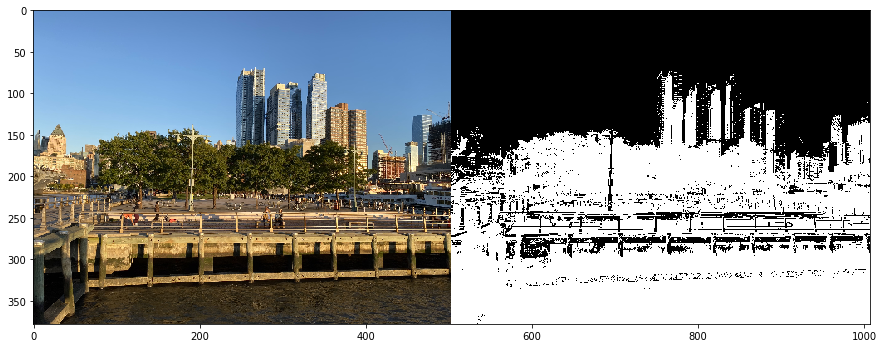

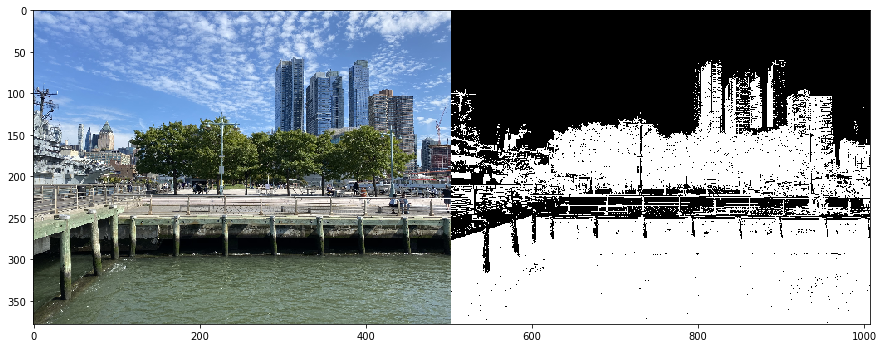

In [4]:
for file in files:
    im = cv2.imread(file)
    print(file, im.shape)

    h, w, _ = im.shape
    Z = cv2.resize(im, (w//8, h//8))[:, :, ::-1]
    print(Z.shape)

    xx, yy = np.meshgrid(np.linspace(0, 1, Z.shape[0]), np.linspace(0, 1, Z.shape[1]))

    K = np.concatenate((Z/255., xx.T[:, :, None], yy.T[:, :, None]), axis=2)

    Kt = K.reshape((K.shape[0] * K.shape[1], K.shape[2]))
    Kt = MinMaxScaler().fit_transform(Kt)

    km = KMeans(n_clusters=2).fit(Kt)
    labels = km.predict(Kt)

    im2 = labels.reshape((Z.shape[0], Z.shape[1]))
    im2 = (np.repeat(im2[:, :, None], 3, axis=-1) * 255).astype('uint8')

    if im2[0].mean(0).mean(0) > 200:
        im2 = 255 - im2
    
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.imshow(np.concatenate((Z, im2), axis=1))
plt.show()